##Importing Necessary Packages

In [1]:
!pip install nltk
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
import gensim
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout,Bidirectional,GRU
import tensorflow as tf
from keras.callbacks import ReduceLROnPlateau
from sklearn.feature_extraction.text import CountVectorizer


## Loading the dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
p1 = '/content/drive/MyDrive/Colab Notebooks/project/spam_1.csv'

Mounted at /content/drive


In [5]:
df = pd.read_csv(p1,encoding = 'latin-1')
df1=df.copy(deep=False)
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.shape

(10743, 5)

##Preprocessing the dataset



In [7]:
# 1. Data cleaning
df.drop( columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)


In [8]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
10738,ham,put the 10 on the ft\r\nthe transport volumes...
10739,ham,3 / 4 / 2000 and following noms\r\nhpl can ' ...
10740,ham,calpine daily gas nomination\r\n>\r\n>\r\njul...
10741,ham,industrial worksheets for august 2000 activit...


In [9]:
df.sample(3)

,v1,v2
9017,spam,"shrugging\r\ncormier , }\r\n_ 95 % 0 ff for\r..."
5019,ham,"It's cool, we can last a little while. Getting..."
7834,spam,"quailty web solutions , involutory\r\noverton..."


In [10]:
#rename
df.rename(columns = {'v1' :'target','v2':'text'}, inplace = True)

In [11]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
10738,ham,put the 10 on the ft\r\nthe transport volumes...
10739,ham,3 / 4 / 2000 and following noms\r\nhpl can ' ...
10740,ham,calpine daily gas nomination\r\n>\r\n>\r\njul...
10741,ham,industrial worksheets for august 2000 activit...


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
df['target']=encoder.fit_transform(df['target'])

In [14]:
df   #0 = ham , 1 = spam

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
10738,0,put the 10 on the ft\r\nthe transport volumes...
10739,0,3 / 4 / 2000 and following noms\r\nhpl can ' ...
10740,0,calpine daily gas nomination\r\n>\r\n>\r\njul...
10741,0,industrial worksheets for august 2000 activit...


In [15]:
# check missing value
df.isna().sum()

target    0
text      0
dtype: int64

In [16]:
df.duplicated().sum()

581

In [17]:
df.drop_duplicates(keep = 'first' , inplace = True)

In [18]:
df.shape

(10162, 2)

In [19]:
df.duplicated().sum()

0

## EDA

In [20]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df['target'].value_counts()

0    8047
1    2115
Name: target, dtype: int64

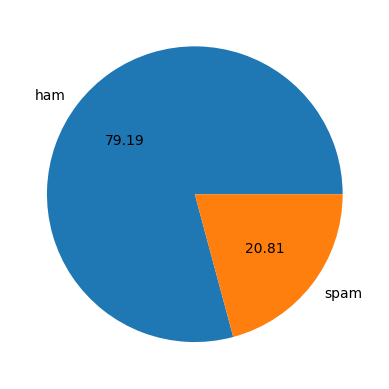

In [22]:
plt.pie(df['target'].value_counts() , labels = ['ham', 'spam'] ,autopct = '%0.2f')
plt.show()

Replacing Spam category with 1 and ham category with 0

In [23]:
df1 = df1.rename(columns = {'v1':'category','v2':'text'})
df1.fillna("",inplace = True)
df1['text'] = df1['text'] + ' ' + df1['Unnamed: 2'] + ' ' + df1['Unnamed: 3'] + ' ' + df1['Unnamed: 4']
del df1['Unnamed: 2']
del df1['Unnamed: 3']
del df1['Unnamed: 4']

df1.head()

,category,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
df1.category.replace("ham",0,inplace = True)
df1.category.replace("spam",1,inplace = True)

In [25]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

Basic Data Cleaning

In [26]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)
#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            if i.strip().isalpha():
                final_text.append(i.strip())
    return " ".join(final_text)
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text
#Apply function on review column
df1['text']=df1['text'].apply(denoise_text)

<ipython-input-26-eaa6a4d4f5ab>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [27]:
df['num_character']=df['text'].apply(len)

Number of characters in texts

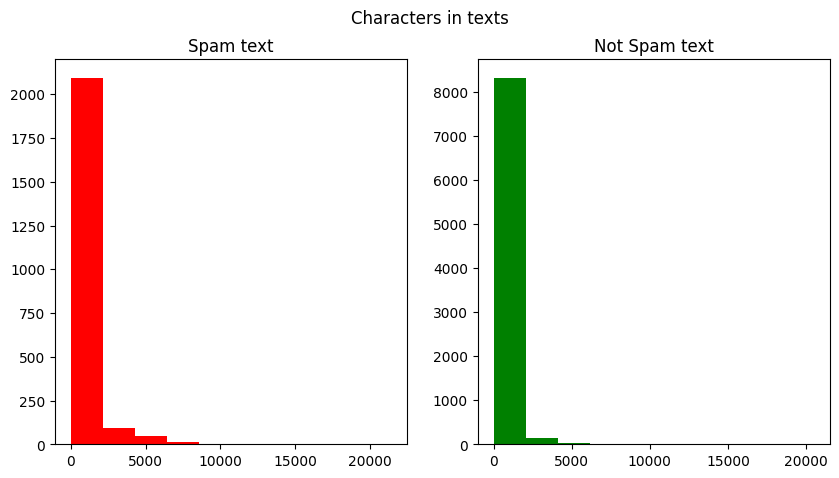

In [28]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
text_len=df1[df1['category']==1]['text'].str.len()
ax1.hist(text_len,color='red')
ax1.set_title('Spam text')
text_len=df1[df1['category']==0]['text'].str.len()
ax2.hist(text_len,color='green')
ax2.set_title('Not Spam text')
fig.suptitle('Characters in texts')
plt.show()

The distribution of both seems to be completely different.60 to 70 characters in text is the most common in spam category while around 50-70 characters in text are most common in Not Spam / Ham category.

Number of words in each text

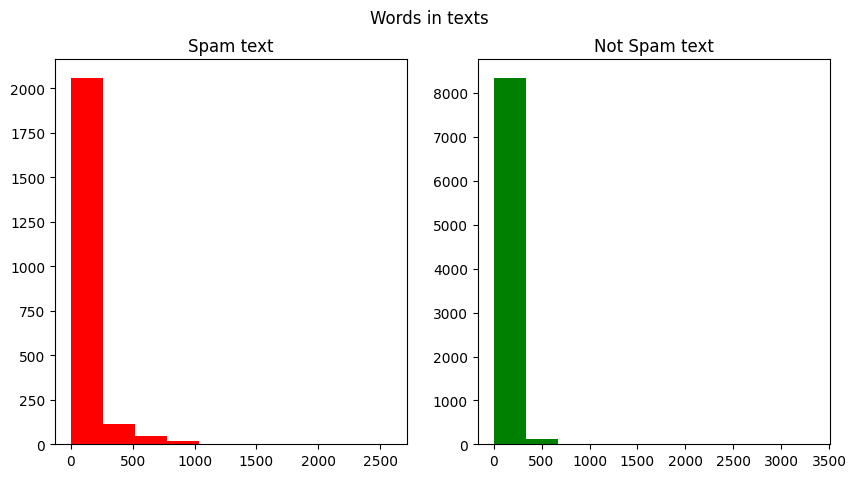

In [29]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
text_len=df1[df1['category']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='red')
ax1.set_title('Spam text')
text_len=df1[df1['category']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='green')
ax2.set_title('Not Spam text')
fig.suptitle('Words in texts')
plt.show()


Average word length in a text

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-30-fca39cee80c5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-

Text(0.5, 0.98, 'Average word length in each text')

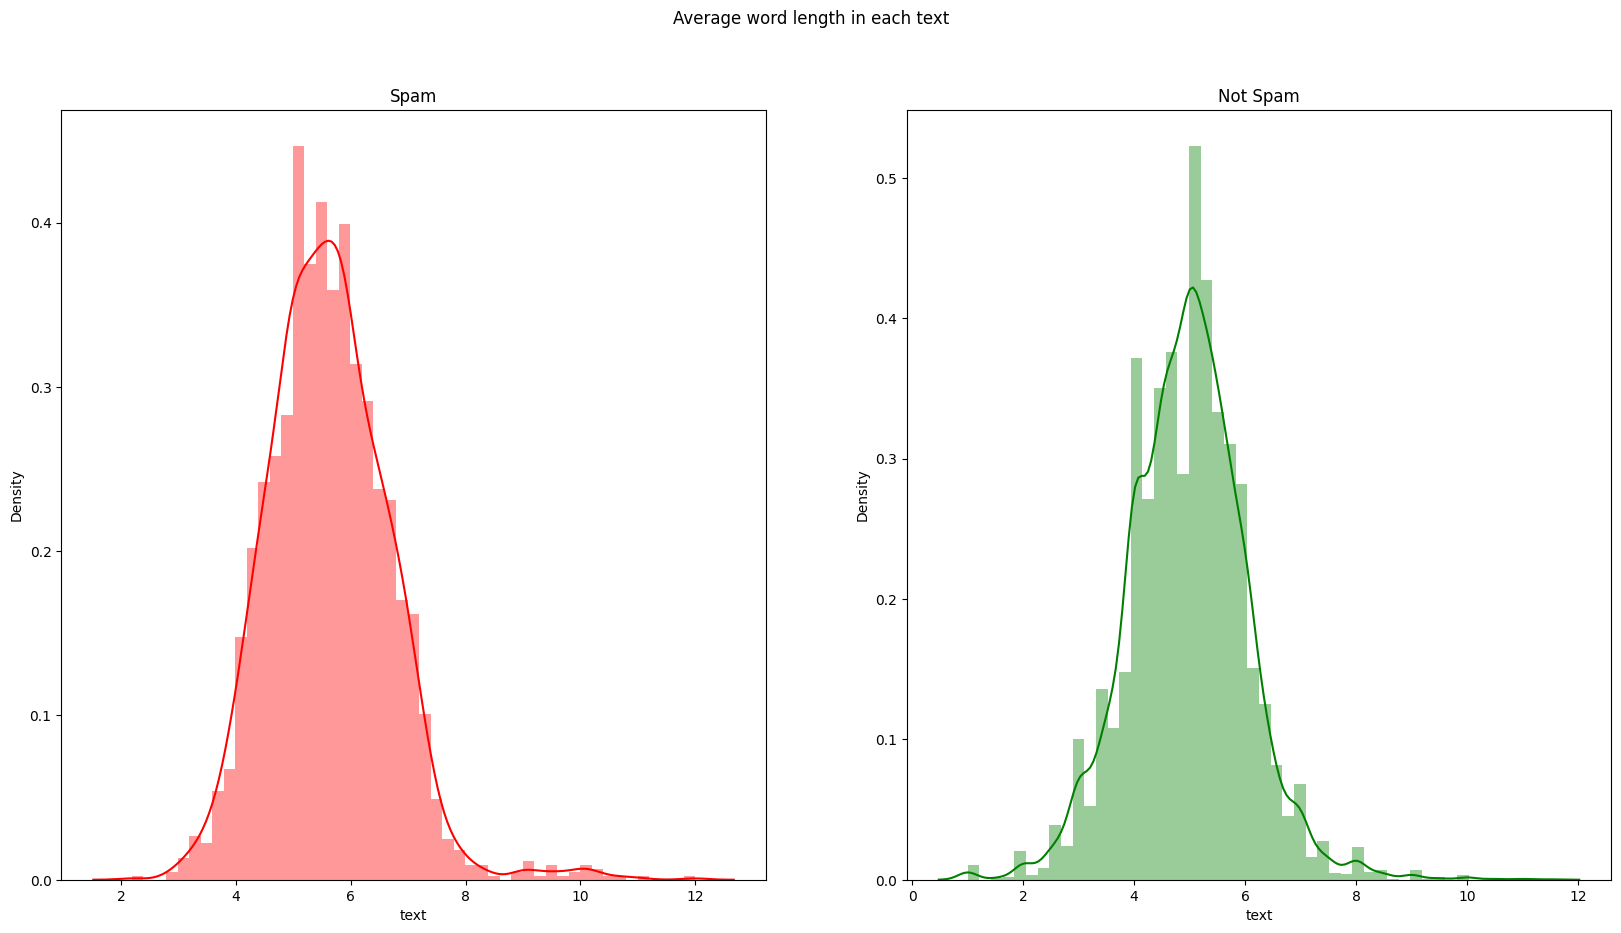

In [30]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word=df1[df1['category']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Spam')
word=df1[df1['category']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Not Spam')
fig.suptitle('Average word length in each text')

In [31]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(df.text)
corpus[:5]

['Go', 'until', 'jurong', 'point,', 'crazy..']

In [32]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'-': 83998,
 '.': 54126,
 '/': 42269,
 ',': 40125,
 'the': 26246,
 ':': 24660,
 'to': 21955,
 'ect': 13693,
 'and': 13476,
 '@': 12592}

Unigram Analysis

<Axes: >

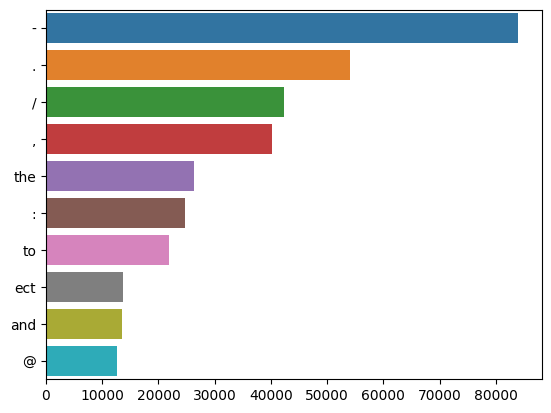

In [33]:
sns.barplot(x=list(most_common.values()),y=list(most_common.keys()))

Bigram Analysis

<Axes: >

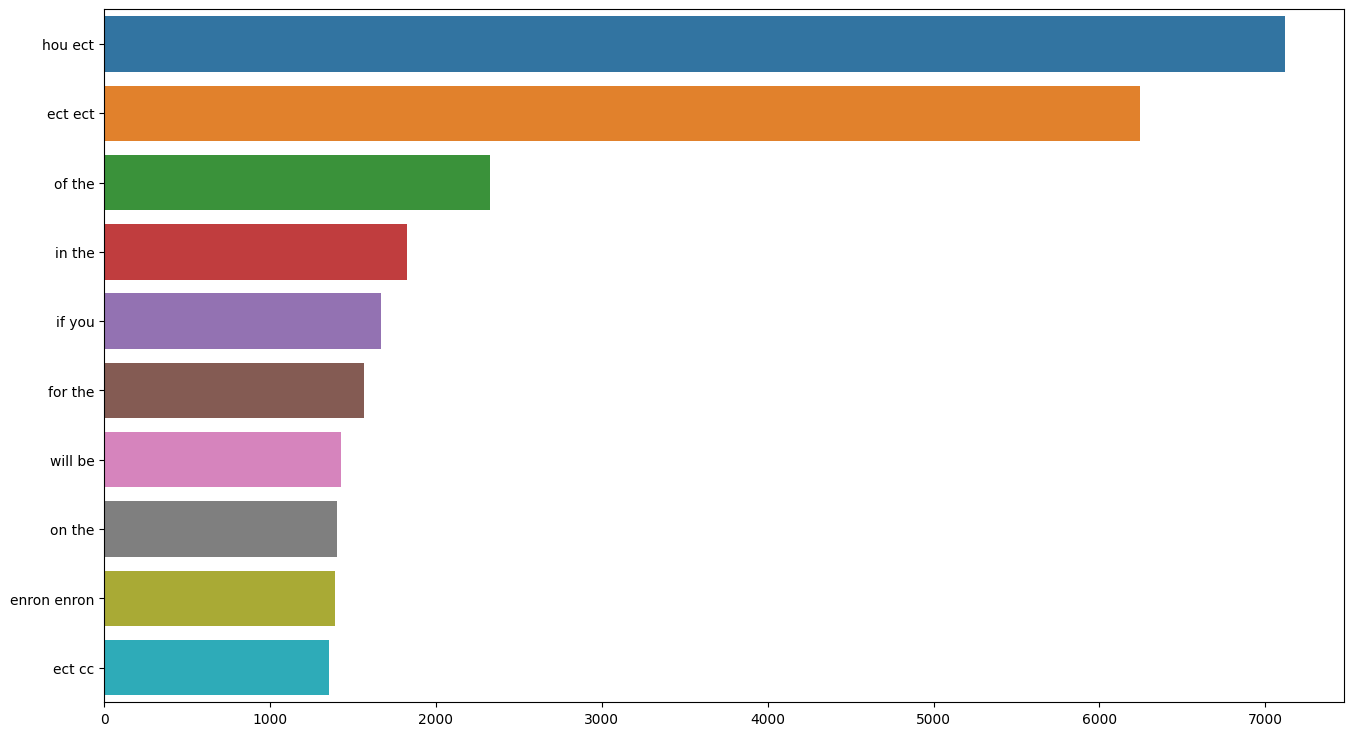

In [34]:
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
plt.figure(figsize = (16,9))
most_common_bi = get_top_text_ngrams(df.text,10,2)
most_common_bi = dict(most_common_bi)
sns.barplot(x=list(most_common_bi.values()),y=list(most_common_bi.keys()))

Trigram Analysis

<Axes: >

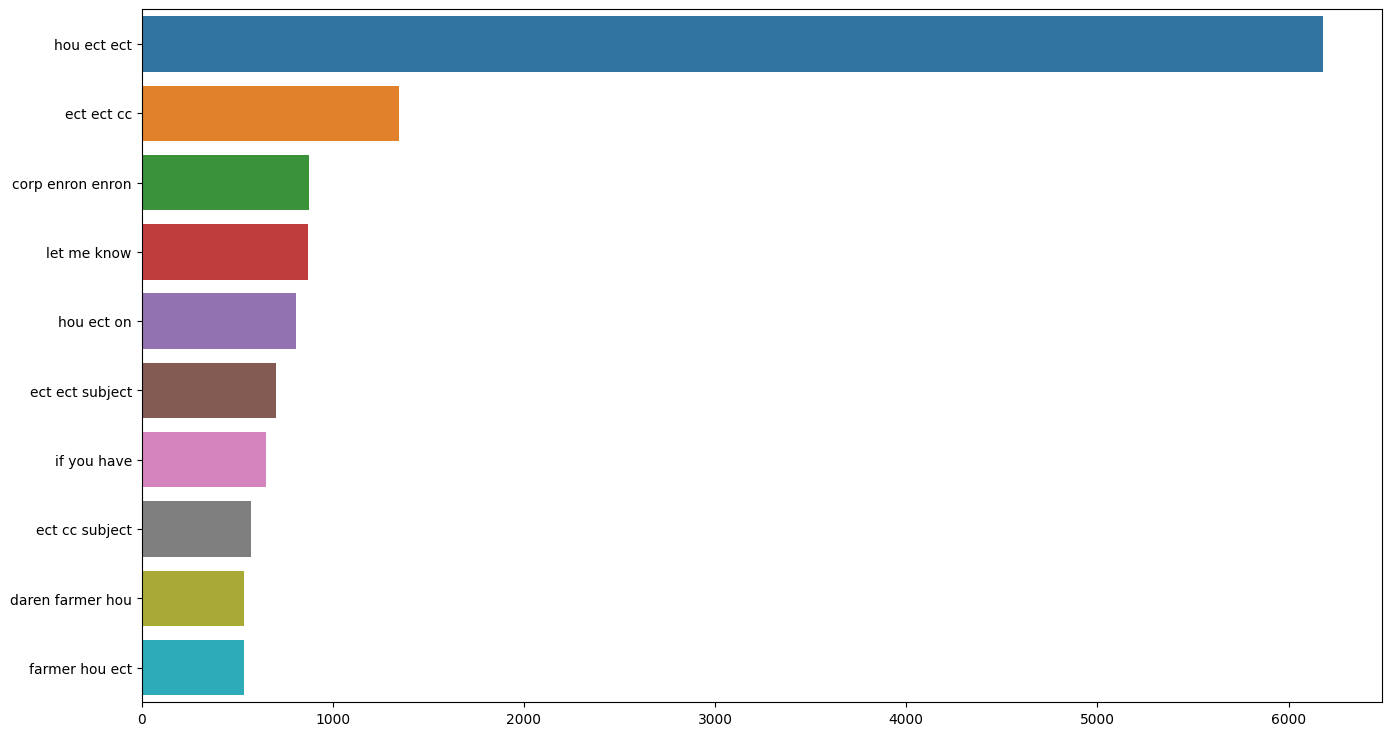

In [35]:
plt.figure(figsize = (16,9))
most_common_tri = get_top_text_ngrams(df.text,10,3)
most_common_tri = dict(most_common_tri)
sns.barplot(x=list(most_common_tri.values()),y=list(most_common_tri.keys()))

In [36]:
df

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
10737,0,"fw : crosstex energy , driscoll ranch # 1 , #...",861
10738,0,put the 10 on the ft\r\nthe transport volumes...,526
10739,0,3 / 4 / 2000 and following noms\r\nhpl can ' ...,1106
10741,0,industrial worksheets for august 2000 activit...,565


In [37]:
df['num_word']=df['text'].apply( lambda x: nltk.word_tokenize(x)).apply(len)

In [38]:
df['num_sentence']=df['text'].apply( lambda x: nltk.sent_tokenize(x)).apply(len)

In [39]:
df.head()

,target,text,num_character,num_word,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [40]:
df[['num_character', 'num_word', 'num_sentence']].describe()

,num_character,num_word,num_sentence
count,10162.000000,10162.000000,10162.000000
mean,561.694450,123.220527,7.577249
std,1191.658714,261.691005,20.438804
min,2.000000,0.000000,0.000000
25%,55.250000,14.000000,1.000000
50%,142.000000,30.500000,3.000000
75%,532.000000,120.000000,7.000000
max,32250.000000,8861.000000,1204.000000


In [41]:
df[df['target'] == 0 ][['num_character', 'num_word', 'num_sentence']].describe()

,num_character,num_word,num_sentence
count,8047.000000,8047.000000,8047.000000
mean,472.608053,109.882068,6.138934
std,1035.363196,246.858760,17.504968
min,2.000000,1.000000,1.000000
25%,47.000000,12.000000,1.000000
50%,104.000000,25.000000,2.000000
75%,426.000000,102.000000,6.000000
max,32250.000000,8861.000000,1204.000000


In [42]:
df[df['target'] == 1 ][['num_character', 'num_word', 'num_sentence']].describe()

,num_character,num_word,num_sentence
count,2115.000000,2115.000000,2115.000000
mean,900.643972,173.969740,13.049645
std,1612.562568,306.544391,28.351355
min,3.000000,0.000000,0.000000
25%,149.000000,29.000000,3.000000
50%,323.000000,65.000000,5.000000
75%,855.500000,172.000000,13.000000
max,22065.000000,3961.000000,693.000000


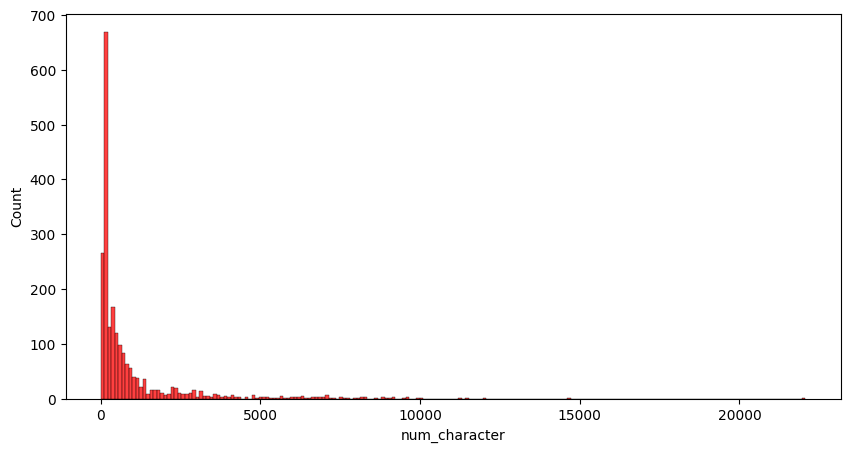

In [43]:
plt.figure(figsize=(10,5))
#sns.histplot(df[df['target']==0]['num_character'], color = 'yellow')
sns.histplot(df[df['target']==1]['num_character'] , color = 'red')
plt.show()

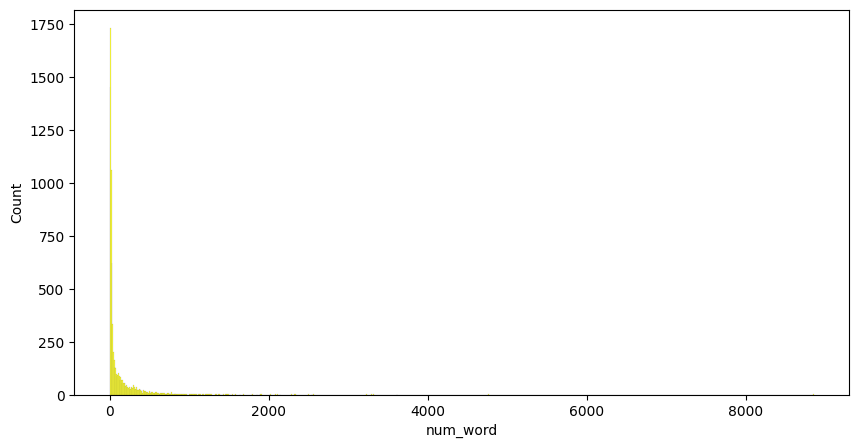

In [44]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['target']==0]['num_word'], color = 'yellow')
#sns.histplot(df[df['target']==1]['num_word'] , color = 'red')
plt.show()

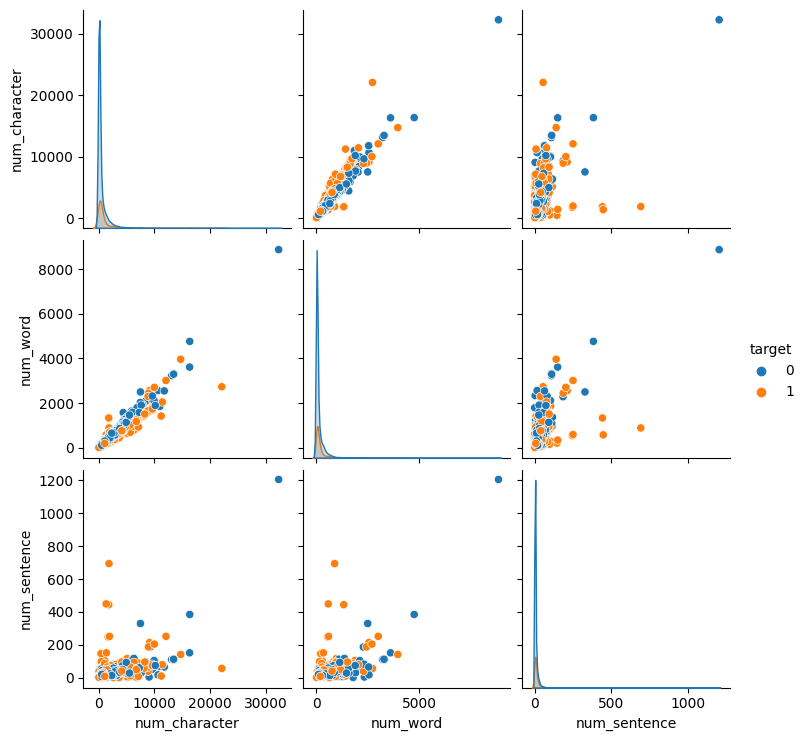

In [45]:
sns.pairplot(df,hue= ('target'))
plt.show()

<Axes: >

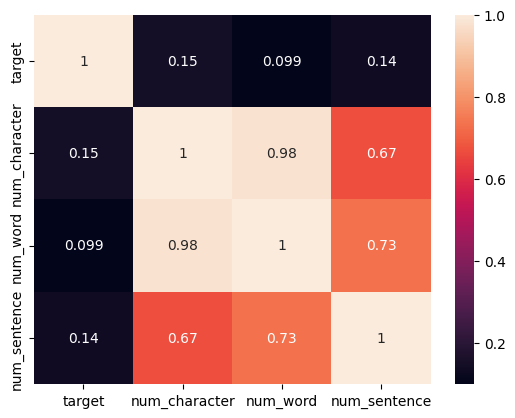

In [46]:
#to see correlation matrix
df_numeric = df.select_dtypes(include=[np.number])
sns.heatmap(df_numeric.corr() , annot = True)

The first step is to convert the text into lowercase to ensure uniformity in letter casing.

After converting to lowercase, the text is tokenized to break it into individual words or tokens.

Special characters are removed from the tokenized text to clean it from non-alphanumeric characters.

Stopwords, which are common and non-essential words like "and," "the," "is," etc., are removed from the text to focus on more meaningful words.

Finally, stemming is applied to the text to reduce words to their root or base form, aiding in text analysis and processing.

In [47]:
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()

    text= nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)


    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and  i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [48]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [49]:
from nltk.corpus import stopwords


In [50]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [51]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [52]:
transform_text('HI Somu MY sely  Ak?!')

'hi somu seli ak'

In [53]:
ps.stem('danceing')

'danc'

In [54]:
df['transform_text']=df['text'].apply(transform_text)

In [55]:
df.head()

,target,text,num_character,num_word,num_sentence,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [56]:
#word cloud
from wordcloud import WordCloud
wc= WordCloud(width = 700 , height = 700 , min_font_size = 10 ,background_color = 'yellow')

In [57]:
spam_wc = wc.generate(df[df['target'] == 1]['transform_text'].str.cat(sep = ' '))

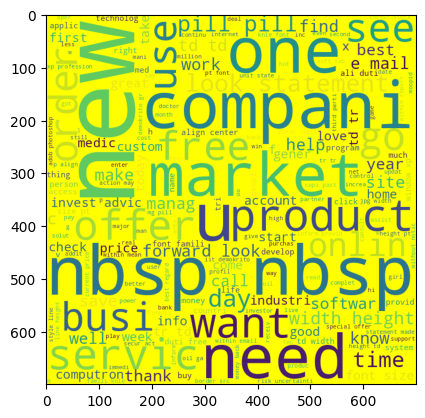

In [58]:
plt.imshow(spam_wc)

In [59]:
#word cloud for ham

ham_wc = wc.generate(df[df['target'] == 0]['transform_text'].str.cat(sep = ' '))

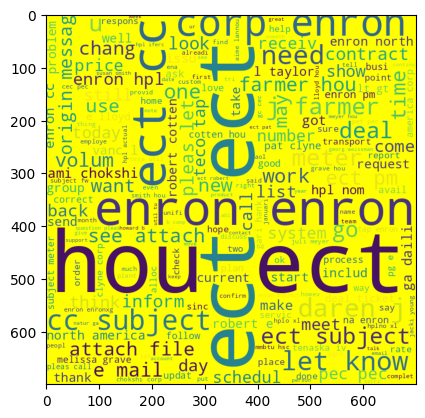

In [60]:
plt.imshow(ham_wc)

In [61]:
#top 50 words

spam_corpus = []
for msg in df[df['target'] == 1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)



In [62]:
len(spam_corpus)

205069

In [63]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(50))

,0,1
0,3,1249
1,2,1008
2,http,999
3,com,989
4,compani,921
5,price,746
6,1,738
7,0,690
8,e,633
9,get,621


In [64]:
ham_corpus = []
for msg in df[df['target'] == 0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)


In [65]:
len(ham_corpus)

412348

In [66]:
pd.DataFrame(Counter(ham_corpus).most_common(50))

,0,1
0,ect,13690
1,hou,7174
2,enron,6442
3,2000,4210
4,deal,3492
5,ga,2798
6,pleas,2749
7,com,2714
8,meter,2709
9,subject,2679


# Preprocessing for Model Building


In [67]:
df2 = pd.read_csv(p1,encoding = 'latin-1')

In [68]:
df2.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [69]:
df2 = df2[['v2', 'v1']]
df2 = df2.rename(columns={'v2': 'messages', 'v1': 'label'})

In [70]:
# check for null values
df2.isnull().sum()

messages    0
label       0
dtype: int64

In [71]:
df2.duplicated().sum()

581

In [72]:
df2.drop_duplicates(keep = 'first' , inplace = True)

In [73]:
df2.shape

(10162, 2)

In [74]:
df2.duplicated().sum()

0

In [75]:
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    # convert to lowercase
    text = text.lower()
    # remove special characters
    text = re.sub(r'[^0-9a-zA-Z]', ' ', text)
    # remove extra spaces
    text = re.sub(r'\s+', ' ', text)
    # remove stopwords
    text = " ".join(word for word in text.split() if word not in STOPWORDS)
    return text

In [76]:
df2.label.replace("ham",0,inplace = True)
df2.label.replace("spam",1,inplace = True)

In [77]:
# clean the messages
df2['clean_text'] = df2['messages'].apply(clean_text)
df2.head()

,messages,label,clean_text
0,"Go until jurong point, crazy.. Available only ...",0,go jurong point crazy available bugis n great ...
1,Ok lar... Joking wif u oni...,0,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry 2 wkly comp win fa cup final tkts 2...
3,U dun say so early hor... U c already then say...,0,u dun say early hor u c already say
4,"Nah I don't think he goes to usf, he lives aro...",0,nah think goes usf lives around though


###Model Building

In [78]:
X = df2['clean_text']
y = df2['label']

In [79]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [80]:
from sklearn.metrics import roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

accuracies = []

def classify(model, X, y):
    # train test split
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True, stratify=y)

    # model training
    pipeline_model = Pipeline([('vect', CountVectorizer()),
                               ('tfidf', TfidfTransformer()),
                               ('clf', model)])
    pipeline_model.fit(x_train, y_train)

    # Prediction probabilities
    y_prob = pipeline_model.predict_proba(x_test)[:, 1]

    # Print ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Print other metrics
    print('Accuracy:', pipeline_model.score(x_test, y_test) * 100)
    y_pred = pipeline_model.predict(x_test)
    print(classification_report(y_test, y_pred))


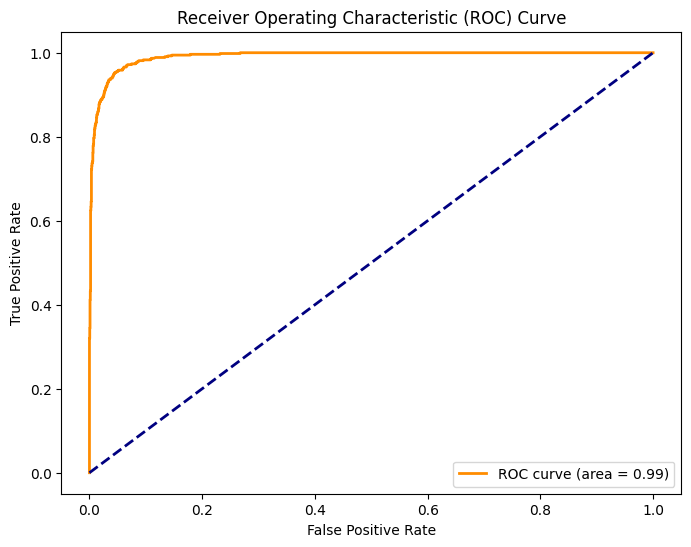

Accuracy: 94.13616686343958
              precision    recall  f1-score   support

           0       0.94      1.00      0.96      2012
           1       0.97      0.74      0.84       529

    accuracy                           0.94      2541
   macro avg       0.96      0.87      0.90      2541
weighted avg       0.94      0.94      0.94      2541



In [81]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
classify(model_lr, X, y)

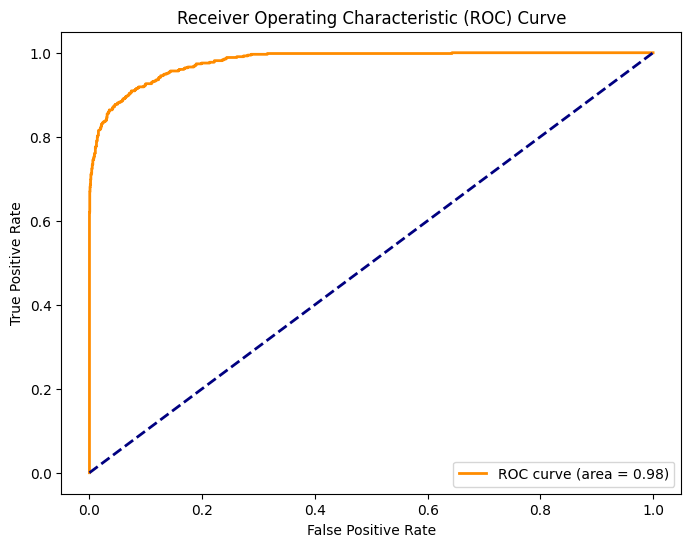

Accuracy: 89.88587170405353
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      2012
           1       1.00      0.51      0.68       529

    accuracy                           0.90      2541
   macro avg       0.94      0.76      0.81      2541
weighted avg       0.91      0.90      0.89      2541



In [82]:
from sklearn.naive_bayes import MultinomialNB
model_mnb = MultinomialNB()
classify(model_mnb, X, y)

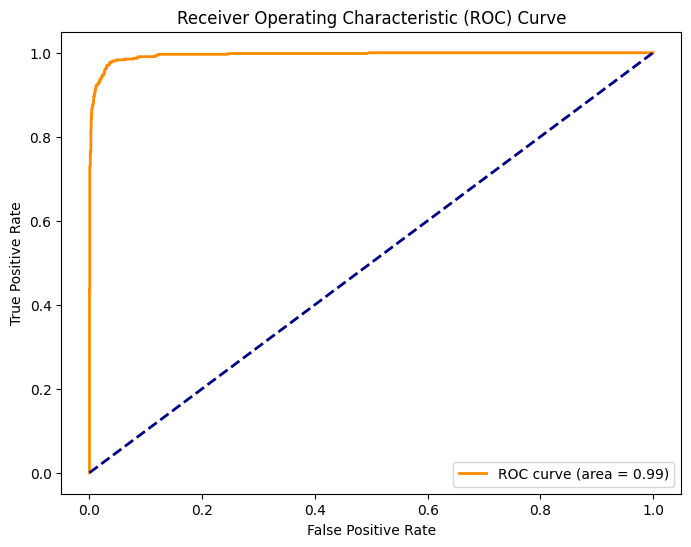

Accuracy: 96.85163321526959
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2012
           1       0.98      0.86      0.92       529

    accuracy                           0.97      2541
   macro avg       0.97      0.93      0.95      2541
weighted avg       0.97      0.97      0.97      2541



In [83]:
from sklearn.svm import SVC
model_svc = SVC(C=3, probability=True)
classify(model_svc, X, y)

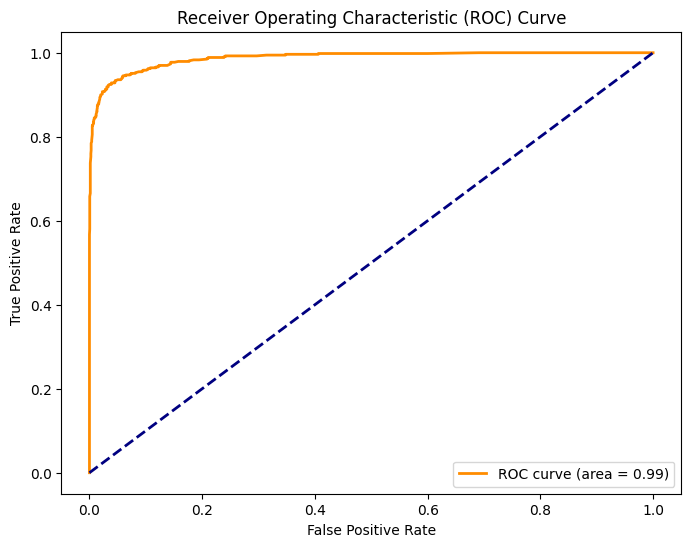

Accuracy: 95.35615899252264
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2012
           1       0.98      0.79      0.88       529

    accuracy                           0.95      2541
   macro avg       0.96      0.89      0.92      2541
weighted avg       0.95      0.95      0.95      2541



In [84]:
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier()
classify(model_rfc, X, y)

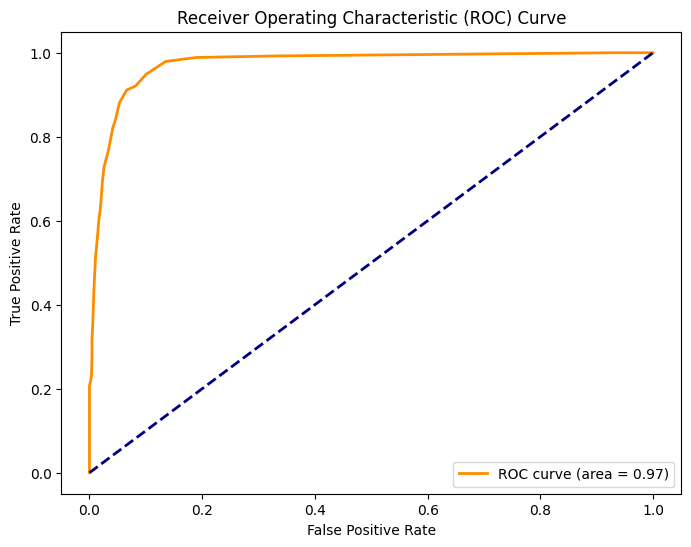

Accuracy: 87.6426603699331
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      2012
           1       0.94      0.44      0.60       529

    accuracy                           0.88      2541
   macro avg       0.90      0.71      0.76      2541
weighted avg       0.88      0.88      0.86      2541



In [85]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=40)
classify(model_knn,X,y)

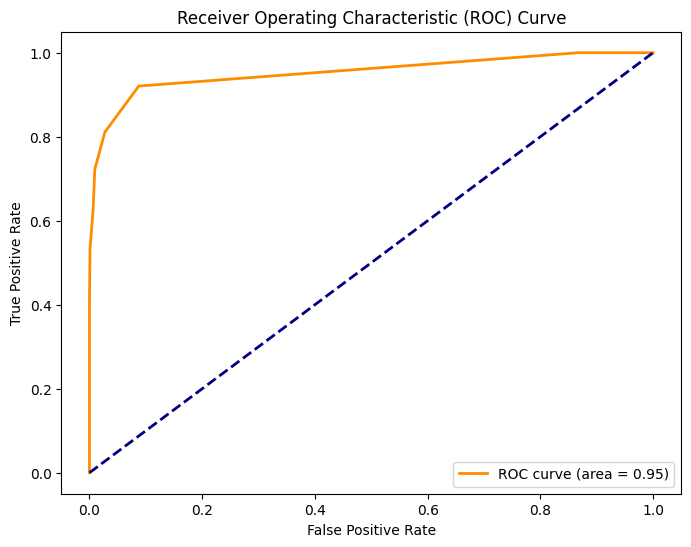

Accuracy: 79.81109799291617
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2012
           1       1.00      0.03      0.06       529

    accuracy                           0.80      2541
   macro avg       0.90      0.52      0.47      2541
weighted avg       0.84      0.80      0.71      2541



In [86]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=17)
classify(model_knn,X,y)

Text(0, 0.5, 'Error Rate')

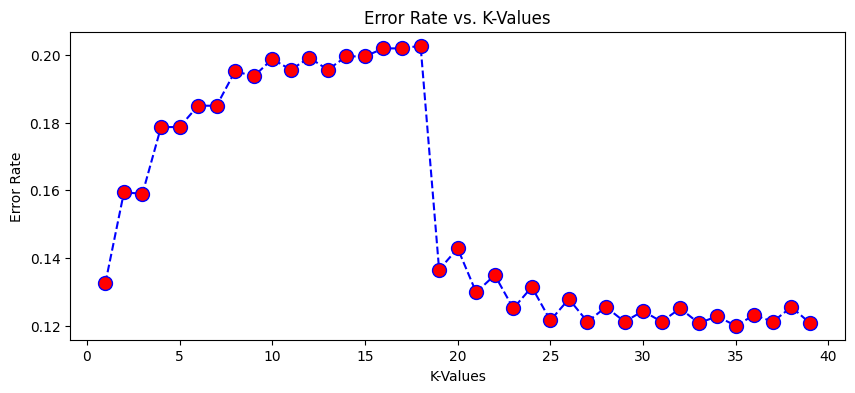

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True, stratify=y)
error_rate = []

# searching k value upto  40
for i in range(1,40):
    # knn algorithm
    knn = KNeighborsClassifier(n_neighbors=i)
    pipeline_model = Pipeline([('vect', CountVectorizer()),
                              ('tfidf', TfidfTransformer()),
                              ('clf', knn)])
    pipeline_model.fit(x_train, y_train)
    # testing the model
    y_pred_i= pipeline_model.predict(x_test)
    error_rate.append(np.mean(y_pred_i != y_test))

# Configure and plot error rate over k values
plt.figure(figsize=(10,4))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K-Values')
plt.xlabel('K-Values')
plt.ylabel('Error Rate')

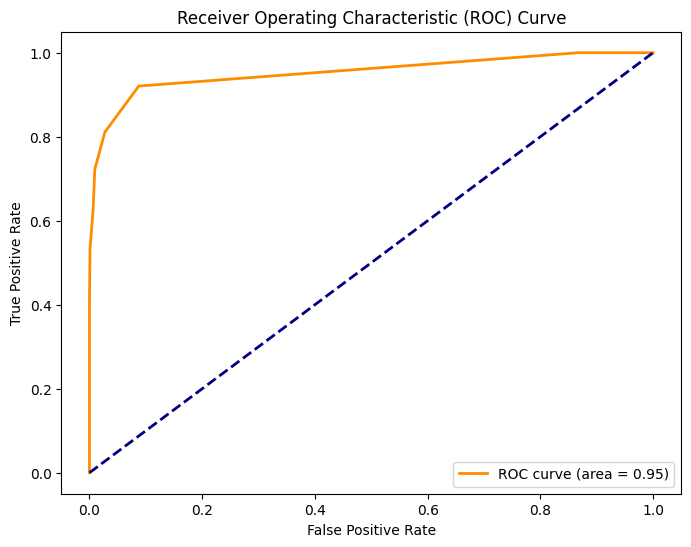

Accuracy: 79.81109799291617
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2012
           1       1.00      0.03      0.06       529

    accuracy                           0.80      2541
   macro avg       0.90      0.52      0.47      2541
weighted avg       0.84      0.80      0.71      2541



In [88]:
from sklearn.neighbors import KNeighborsClassifier
model_knn_21 = KNeighborsClassifier(n_neighbors=21)
classify(model_knn,X,y)

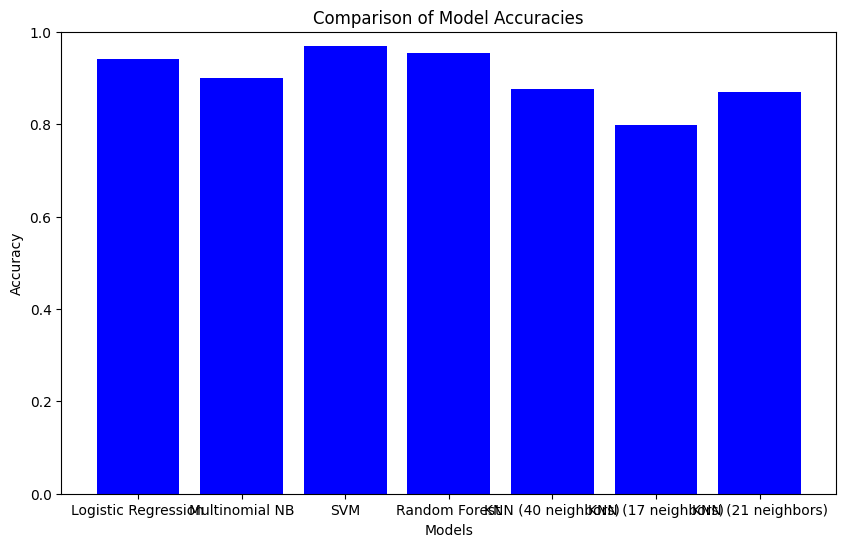

In [89]:
models = [
    LogisticRegression(),
    MultinomialNB(),
    SVC(C=3),
    RandomForestClassifier(),
    KNeighborsClassifier(n_neighbors=40),
    KNeighborsClassifier(n_neighbors=17),
    KNeighborsClassifier(n_neighbors=21)
]

# Store accuracies
accuracies = []

# Evaluate each model
for model in models:
    _, x_test, _, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True, stratify=y)

    pipeline_model = Pipeline([('vect', CountVectorizer()),
                               ('tfidf', TfidfTransformer()),
                               ('clf', model)])
    pipeline_model.fit(x_train, y_train)

    y_pred = pipeline_model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plotting the results
model_names = [
    'Logistic Regression',
    'Multinomial NB',
    'SVM',
    'Random Forest',
    'KNN (40 neighbors)',
    'KNN (17 neighbors)',
    'KNN (21 neighbors)'
]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='blue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)  # Set the y-axis limit to represent accuracy percentage
plt.show()

In [90]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(model_knn_21,open('model_knn.pkl','wb'))

In [92]:
df2['clean_text'][4532]

'gr8 new service live sex video chat mob see sexiest dirtiest girls live ur phone 4 details text horny 89070 cancel send stop 89070'

In [93]:
df2.sample(10)

,messages,label,clean_text
3904,Do you want a new video handset? 750 anytime a...,1,want new video handset 750 anytime network min...
8606,new computer\r\nhey ! just checking out the n...,0,new computer hey checking new machine sent col...
2534,Ok enjoy . R u there in home.,0,ok enjoy r u home
8956,impotency is an embarressing issue - buy onli...,1,impotency embarressing issue buy online cater ...
6230,"hpl nom for april 6 , 2001\r\n( see attached ...",0,hpl nom april 6 2001 see attached file hplno 4...
8556,price for crosstex\r\nwhat do you think ?\r\n...,0,price crosstex think forwarded julie meyers ho...
2636,Thank god they are in bed!,0,thank god bed
2705,What i mean is do they come chase you out when...,0,mean come chase stated watch many movies want
5359,This is ur face test ( 1 2 3 4 5 6 7 8 9 &lt;...,0,ur face test 1 2 3 4 5 6 7 8 9 lt gt select nu...
8741,neon\r\n- awesome agenda . doc,0,neon awesome agenda doc
